In [44]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [133]:
length = 0.09 # length of kick, strictly more than 0
overshoot = 4
sampling_freq = 100 # Hz

# DO NOT CHANGE THIS FORMULA!
s = 1 - np.exp(-3/(length*sampling_freq))

denominator = np.array([1, 
                        s-1])

numerator = np.array([1+overshoot, 
                      -(1+overshoot-s)])
# numerator = np.array([1])

In [134]:
sys = signal.TransferFunction(numerator, denominator, dt=1/sampling_freq)
response = signal.freqz(numerator, denominator)

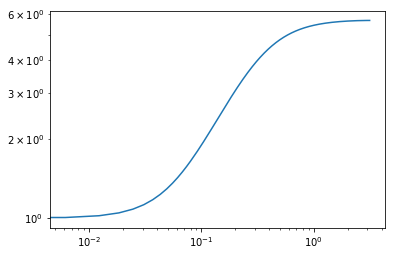

In [135]:
N = 50
x = response[0]
y = np.abs(response[1])

plt.loglog(x, y)
plt.show()

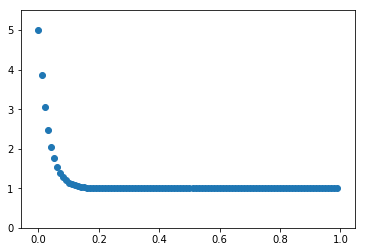

In [137]:
t, step_response = signal.dstep(sys, n = sampling_freq//1)
plt.scatter(t, step_response)
axes = plt.gca()
axes.set_ylim([0,(1+overshoot)*1.1])
plt.show()

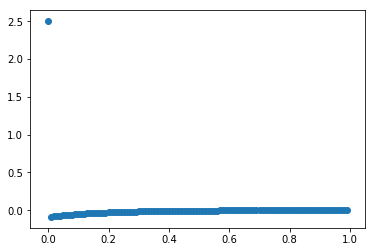

In [132]:
t, impulse_response = signal.dimpulse(sys, n = sampling_freq//1)
plt.scatter(t, impulse_response)
plt.show()

In [121]:
#PUT THIS FILTER INTO MOTOR CONTROLLER
print(numerator)
print(denominator)

[ 2.5        -2.44176453]
[ 1.         -0.94176453]
